In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas.tseries.frequencies import to_offset

# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
# plt.rcParams['text.usetex'] = True
# plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.family'] = "serif"

These data are from the [Mauna Loa Observatory](https://gml.noaa.gov/aftp/data/trace_gases/co2/in-situ/surface/txt/co2_mlo_surface-insitu_1_ccgg_DailyData.txt).

In [12]:
time_columns = ['year', 'month','day', 'hour', 'minute', 'second']
data_columns = ['value']
df = pd.read_csv('../../data/co2_mlo_surface-insitu_1_ccgg_DailyData.txt', 
                 skiprows=158, 
#                  sep='/s', 
                 delimiter=' ',
                 na_values=[-999.99, -99.99],
                 na_filter=True,
                 usecols=time_columns+data_columns)
df['timestamp'] = pd.to_datetime(df[time_columns])
df.set_index('timestamp', inplace=True)
df.drop(columns=time_columns, inplace=True)
df

,value
timestamp,
1974-01-01,NaN
1974-01-02,NaN
1974-01-03,NaN
1974-01-04,NaN
1974-01-05,NaN
...,...
2024-12-27,425.53
2024-12-28,425.43
2024-12-29,425.33


In [13]:
df.isnull().sum()

value    3304
dtype: int64

In [14]:
df[df.value.isnull()]

,value
timestamp,
1974-01-01,NaN
1974-01-02,NaN
1974-01-03,NaN
1974-01-04,NaN
1974-01-05,NaN
...,...
2024-11-19,NaN
2024-11-26,NaN
2024-12-04,NaN


In [15]:
df.dropna(inplace=True)
df.isnull().sum()

value    0
dtype: int64

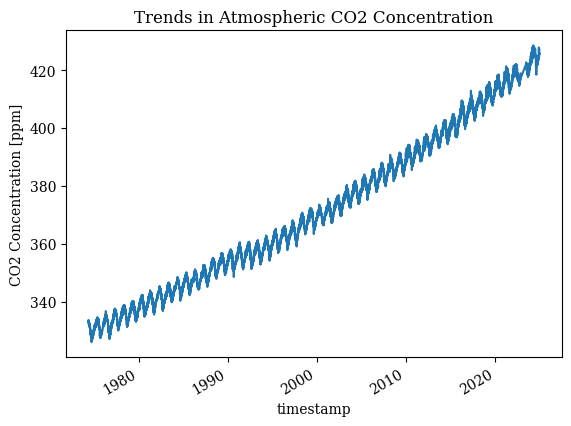

In [16]:
ax = df.value.plot()
ax.set_ylabel('CO2 Concentration [ppm]')
ax.set_title('Trends in Atmospheric CO2 Concentration')
plt.show()

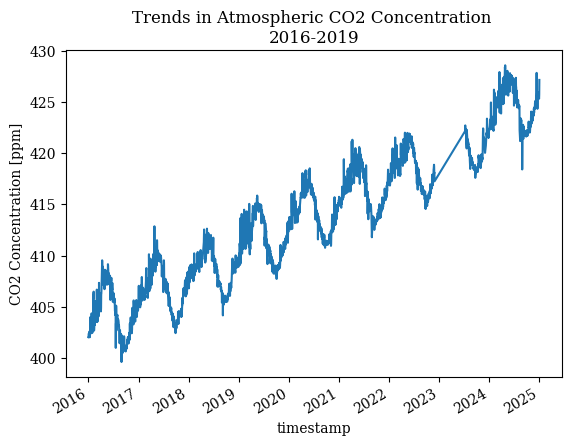

In [17]:
ax = df[df.index.year >= 2016].value.plot()
ax.set_ylabel('CO2 Concentration [ppm]')
ax.set_title('Trends in Atmospheric CO2 Concentration \n2016-2019')
plt.show()

<Axes: xlabel='timestamp'>

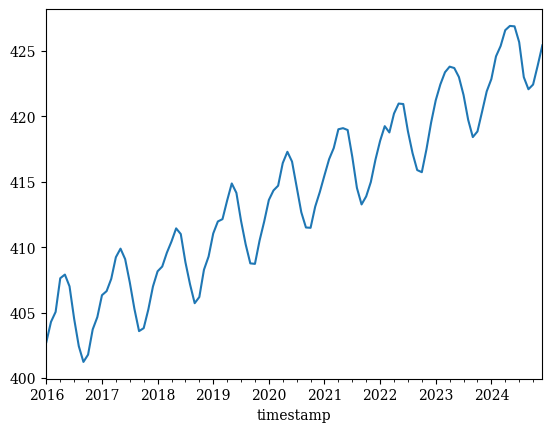

In [26]:
df_monC = df.resample('ME', offset='14D').mean().interpolate(method='cubic')
df_monC[df_monC.index.year>=2016].value.plot()

<Axes: xlabel='timestamp'>

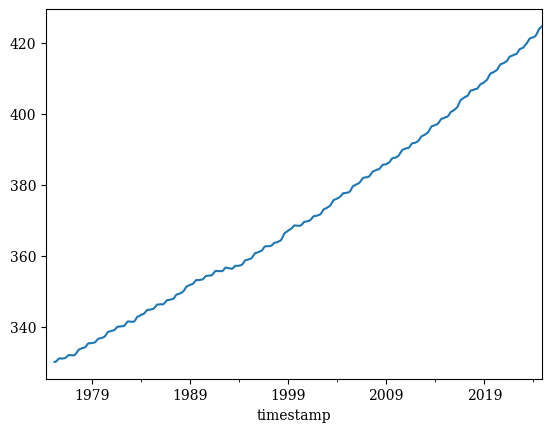

In [27]:
df_smooth = df_monC.rolling(11).mean()
df_smooth.value.plot()

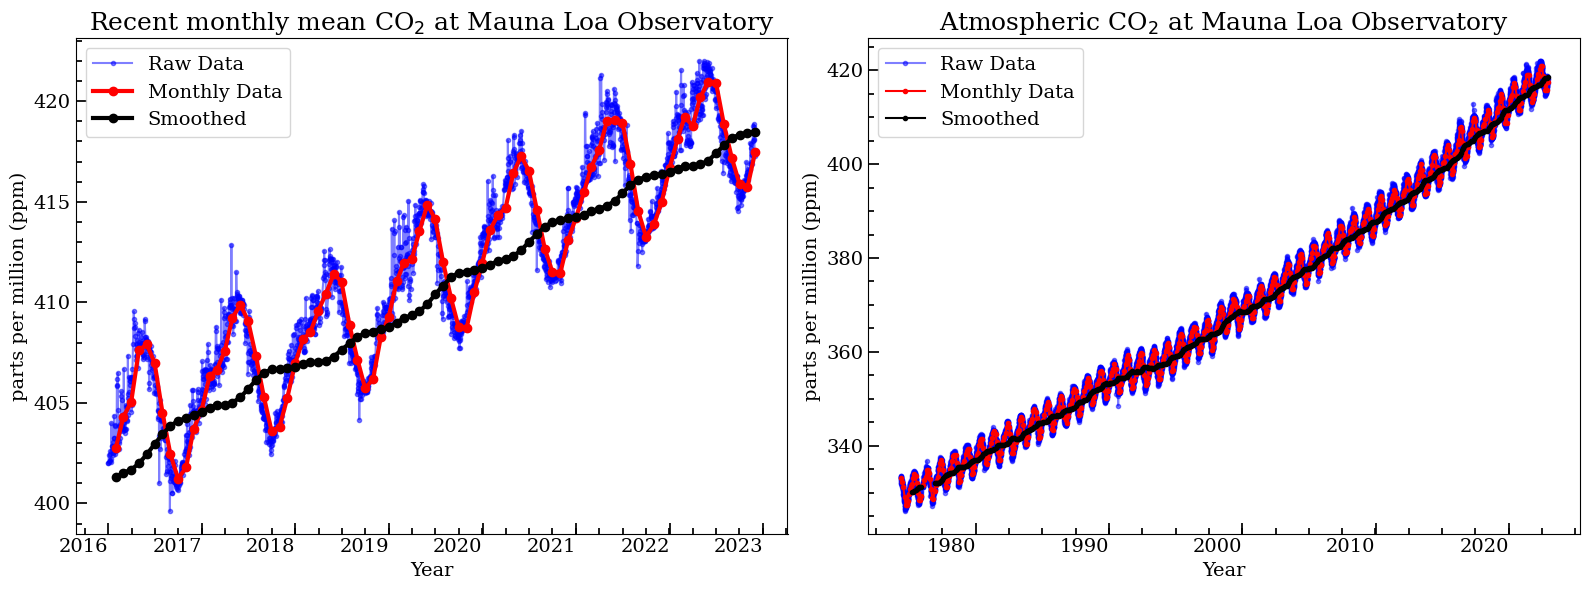

In [10]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(1,2,figsize=(16,6))

df.value.plot(ax=axes[1], label='Raw Data', color='b', marker='.', alpha=0.5)
df_monC.value.plot(ax=axes[1], label='Monthly Data', marker='.', color='r')
df_smooth.value.plot(ax=axes[1], label='Smoothed', marker='.', color='k')
axes[1].legend(fontsize=14)

df[df.index.year>=2016].value.plot(ax=axes[0], label='Raw Data', color='b', 
                                   marker='.', alpha=0.5)
df_monC[df_monC.index.year>=2016].value.plot(ax=axes[0], label='Monthly Data', 
                                             marker='o', color='r', lw=3)
df_smooth[df_smooth.index.year>=2016].value.plot(ax=axes[0], label='Smoothed', 
                                                 marker='o', color='k', lw=3)

axes[0].legend(fontsize=14)
axes[0].minorticks_on()
axes[1].minorticks_on()
axes[0].xaxis.set_major_locator(mdates.YearLocator())
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0].tick_params(axis='both',which='both',direction='in',rotation=0, 
                    labelsize=14, width=1.25)
axes[0].tick_params(axis='both',which='minor',length=4)
axes[0].tick_params(axis='both',which='major',length=8)
axes[1].tick_params(axis='both',which='both',direction='in',rotation=0, 
                    labelsize=14, width=1.25)
axes[1].tick_params(axis='both',which='minor',length=4)
axes[1].tick_params(axis='both',which='major',length=8)

axes[0].set_ylabel('parts per million (ppm)', fontsize=14)
axes[1].set_ylabel('parts per million (ppm)',fontsize=14)

axes[0].set_xlabel('Year', fontsize=14)
axes[1].set_xlabel('Year', fontsize=14)


axes[0].set_title('Recent monthly mean CO$_2$ at Mauna Loa Observatory', fontsize=18)
axes[1].set_title('Atmospheric CO$_2$ at Mauna Loa Observatory', fontsize=18)
# axes[0].set_ylim(399,421)
plt.tight_layout()

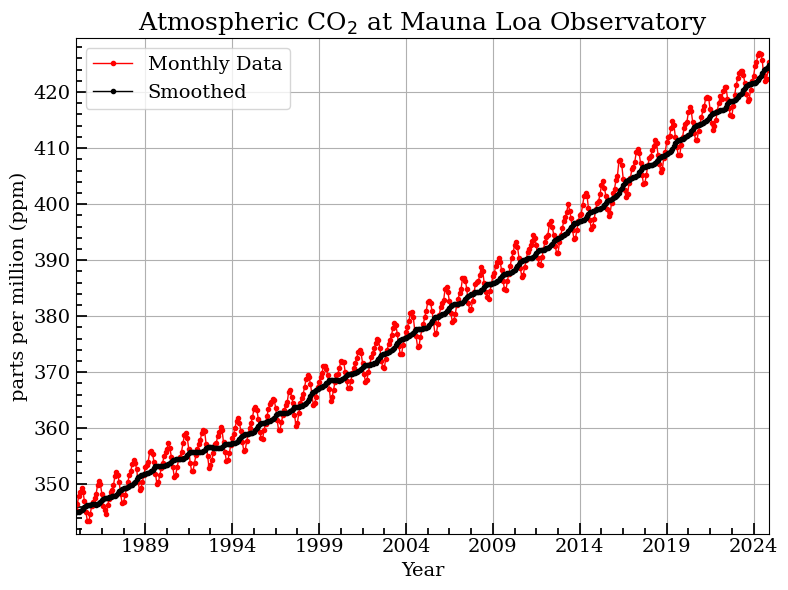

In [35]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(1,1,figsize=(8,6))

start_year = 1985
end_year = 2024

# df.value.plot(ax=axes, label='Raw Data', color='b', marker='.', alpha=0.5)
# df_monC.value.plot(ax=axes, label='Monthly Data', marker='.', color='r')
# df_smooth.value.plot(ax=axes, label='Smoothed', marker='.', color='k')

# df[df.index.year>=start_year].value.plot(ax=axes, label='Raw Data', color='b', 
#                                    marker='.', alpha=0.5)
df_monC[df_monC.index.year>=start_year].value.plot(ax=axes, label='Monthly Data', 
                                             marker='.', color='r', lw=1)
df_smooth[df_smooth.index.year>=start_year].value.plot(ax=axes, label='Smoothed', 
                                                 marker='.', color='k', lw=1)


axes.legend(fontsize=14)



axes.minorticks_on()

axes.tick_params(axis='both',which='both',direction='in',rotation=0, 
                    labelsize=14, width=1.25)
axes.tick_params(axis='both',which='minor',length=4)
axes.tick_params(axis='both',which='major',length=8)

axes.set_ylabel('parts per million (ppm)',fontsize=14)

axes.set_xlabel('Year', fontsize=14)


axes.set_title('Atmospheric CO$_2$ at Mauna Loa Observatory', fontsize=18)
axes.grid()

co2_min = df[df.index.year==start_year].value.min()
co2_max = df[df.index.year==end_year].value.max()
axes.set_ylim(co2_min-1, co2_max+1)
# axes.set_xlim('01-01-2010', '010')
plt.tight_layout()
# plt.savefig("../docs/figures/mauna-loa-co2.pgf")